<a href="https://colab.research.google.com/github/GarvChaudhaAI/Tensorflow-2.2.0-YOLOv1/blob/main/YOLO_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Jan 15 04:34:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2020-10-30 04:53:57--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.131.83
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.131.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  61.3MB/s    in 3m 25s  

2020-10-30 04:57:22 (62.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2020-10-30 05:08:11--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.243.76
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.243.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  35.2MB/s    in 6.5s    

2020-10-30 05:08:18 (37.3 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
#!pip install zipfile
import zipfile
h=zipfile.ZipFile("//content//annotations_trainval2014.zip")
h.extractall()
h.close()

In [ ]:
!wget https://pjreddie.com/media/files/voc_label.py
!git clone https://github.com/chentinghao/download_google_drive.git
!python /content/download_google_drive/download_gdrive.py 1-6832aTpz_-kzTxrGTnpVPWH-6i0ObQy VOCtrainval_06-Nov-2007.tar
!python /content/download_google_drive/download_gdrive.py 176XdliZfMZklzYnnPR86BddGhgTLm8Kl VOCtrainval_11-May-2012.tar
!python /content/download_google_drive/download_gdrive.py 1-ArlUg8_24BivOxlDAtjYQfw_Nj4ZC2h VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!python /content/voc_label.py

--2021-01-15 04:34:38--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-01-15 04:34:39 (376 MB/s) - ‘voc_label.py’ saved [2042/2042]

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
439MB [00:06, 75.7MB/s]
1.86GB [00:22, 88.8MB/s]
430MB [00:12, 34.9MB/s]


In [ ]:
!python --version

Python 3.6.9


In [ ]:
print(tf.__version__)
#print(os.__version__)
print(cv2.__version__)
print(PIL.__version__)
print(matplotlib.__version__)
print(tfa.__version__)

2.3.0
4.1.2
7.0.0
3.2.2
0.8.3


In [ ]:
# requirements tensorflow==2.2.0 necessary
# cv2==4.1.2
# PIL==7.0.0
# matplotlib==3.2.2
# tfa==0.8.3
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 34kB/s 
     |████████████████████████████████| 460kB 50.2MB/s 
     |████████████████████████████████| 3.0MB 52.8MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import random 
import PIL
from PIL import Image,ImageDraw,ImageFont
import glob

In [ ]:
print(tf.math.is_nan(tf.Variable(0,tf.float32)/tf.Variable(0,tf.float32))==True)

tf.Tensor(True, shape=(), dtype=bool)


In [ ]:
 
giou = tfa.losses.GIoULoss()
def loss(y_true,y_pred):
  pred_conf = y_pred[...,12:15]
  pred_xy = tf.stack([y_pred[...,:2],y_pred[...,4:6],y_pred[...,8:10]],axis=3)
  pred_wh = (tf.stack([y_pred[...,2:4],y_pred[...,6:8],y_pred[...,10:12]],axis=3))
  pred_class = y_pred[...,15:]
  label_conf = y_true[...,4:5]
  label_xy = tf.tile(tf.expand_dims(y_true[...,:2],axis=3),[1,1,1,3,1])
  label_wh = tf.tile(tf.expand_dims(y_true[...,2:4],axis=3),[1,1,1,3,1])
  label_class = y_true[...,5:]
  grid = tf.meshgrid(tf.range(7),tf.range(7))
  grid = tf.cast(tf.reshape(tf.concat(grid,axis=-1)/7,[1,7,7,1,2]),tf.float32)
  box1= tf.concat([label_xy/7+grid,label_wh],axis=-1)
  box2= tf.concat([pred_xy/7+grid,pred_wh],axis=-1)
  
  boxes1 = tf.concat([box1[...,:2]/7+grid-box1[...,2:4]*0.5,box1[...,:2]/7+grid+box1[...,2:4]*0.5],axis=-1)
  boxes2 = tf.concat([box2[...,:2]/7+grid-box2[...,2:4]*0.5,box2[...,:2]/7+grid+box2[...,2:4]*0.5],axis=-1)
  iou = calc_iou(box1,box2)
  best = tf.expand_dims(tf.cast(tf.equal(iou,tf.reduce_max(iou,axis=-1,keepdims=True)),tf.float32)*label_conf,axis=-1)
  mask = 1*best[...,0]+0.5*(1-best[...,0])
  loss_conf = tf.reduce_mean(tf.reduce_sum(tf.square(best[...,0]-pred_conf)*mask,[1,2,3]))
  #loss_xy =tf.reduce_mean(tf.reduce_sum(tf.square(label_xy-pred_xy)*best,[1,2,3,4]))
  #loss_wh = tf.reduce_mean(tf.reduce_sum(tf.square(label_wh-pred_wh)*best,[1,2,3,4]))
  lossgiou= tf.reduce_mean(tf.reduce_sum(giou(boxes1,boxes2)*best,[1,2,3,4]))
  loss_class = tf.reduce_mean(tf.reduce_sum(tf.square(label_class-pred_class)*label_conf,[1,2,3]))
  loss = loss_conf+5*(lossgiou)+loss_class
  return loss
a = tf.cast(tf.nn.sigmoid(np.random.randn(1,7,7,25)),tf.float32)
b = tf.cast((np.random.randn(1,7,7,35)),tf.float32)
print(loss(a,b))

tf.Tensor(853.5666, shape=(), dtype=float32)


In [ ]:
def loss(y_true,y_pred):
  pred_conf = y_pred[...,12:15]
  pred_xy = tf.stack([y_pred[...,:2],y_pred[...,4:6],y_pred[...,8:10]],axis=3)
  pred_wh = (tf.stack([y_pred[...,2:4],y_pred[...,6:8],y_pred[...,10:12]],axis=3))
  pred_class = y_pred[...,15:]
  label_conf = y_true[...,4:5]
  label_xy = tf.tile(tf.expand_dims(y_true[...,:2],axis=3),[1,1,1,3,1])
  label_wh = tf.tile(tf.expand_dims(y_true[...,2:4],axis=3),[1,1,1,3,1])
  label_class = y_true[...,5:]
  grid = tf.meshgrid(tf.range(7),tf.range(7))
  grid = tf.cast(tf.reshape(tf.concat(grid,axis=-1)/7,[1,7,7,1,2]),tf.float32)
  box1= tf.concat([label_xy/7+grid,label_wh],axis=-1)
  box2= tf.concat([pred_xy/7+grid,pred_wh],axis=-1)
  
  boxes1 = tf.concat([box1[...,:2]/7+grid-box1[...,2:4]*0.5,box1[...,:2]/7+grid+box1[...,2:4]*0.5],axis=-1)
  boxes2 = tf.concat([box2[...,:2]/7+grid-box2[...,2:4]*0.5,box2[...,:2]/7+grid+box2[...,2:4]*0.5],axis=-1)
  iou = calc_iou(box1,box2)
  best = tf.expand_dims(tf.cast(tf.equal(iou,tf.reduce_max(iou,axis=-1,keepdims=True)),tf.float32)*label_conf,axis=-1)
  mask = 1*best[...,0]+0.5*(1-best[...,0])
  loss_conf = tf.reduce_mean(tf.reduce_sum(tf.square(best[...,0]-pred_conf)*mask,[1,2,3]))
  #loss_xy =tf.reduce_mean(tf.reduce_sum(tf.square(label_xy-pred_xy)*best,[1,2,3,4]))
  #loss_wh = tf.reduce_mean(tf.reduce_sum(tf.square(label_wh-pred_wh)*best,[1,2,3,4]))
  lossgiou= tf.reduce_mean(tf.reduce_sum(calc_diou(boxes1,boxes2)*best[...,0],[1,2,3]))
  loss_class = tf.reduce_mean(tf.reduce_sum(tf.square(label_class-pred_class)*label_conf,[1,2,3]))
  loss = loss_conf+5*(lossgiou)+loss_class
  return loss
a = tf.cast(tf.nn.sigmoid(np.random.randn(1,7,7,25)),tf.float32)
b = tf.cast((np.random.randn(1,7,7,35)),tf.float32)
print(loss(a,b))

tf.Tensor(934.777, shape=(), dtype=float32)


In [ ]:
def calc_iou(box1,box2):
  ba1 = box1[...,2]*box1[...,3]
  ba2 = box2[...,2]*box2[...,3]
  boxes1 = tf.concat([box1[...,:2]-box1[...,2:4]*0.5,box1[...,:2]+box1[...,2:4]*0.5],axis=-1)
  boxes2 = tf.concat([box2[...,:2]-box2[...,2:4]*0.5,box2[...,:2]+box2[...,2:4]*0.5],axis=-1)
  #print(boxes1,boxes2)
  maxes = tf.maximum(boxes1[...,:2],boxes2[...,:2])
  mines = tf.minimum(boxes1[...,2:],boxes2[...,2:])
  intersect = tf.maximum(mines-maxes,0.0)
  intersect = intersect[...,0]*intersect[...,1]
  union = tf.maximum(ba1+ba2-intersect,1e-20)
  return intersect/union

In [ ]:
def calc_diou(box1,box2):
  ba1 = box1[...,2]*box1[...,3]
  ba2 = box2[...,2]*box2[...,3]
  boxes1 = tf.concat([box1[...,:2]-box1[...,2:4]*0.5,box1[...,:2]+box1[...,2:4]*0.5],axis=-1)
  boxes2 = tf.concat([box2[...,:2]-box2[...,2:4]*0.5,box2[...,:2]+box2[...,2:4]*0.5],axis=-1)
  #print(boxes1,boxes2)
  maxes = tf.maximum(boxes1[...,:2],boxes2[...,:2])
  mines = tf.minimum(boxes1[...,2:],boxes2[...,2:])
  intersect = tf.maximum(mines-maxes,0.0)
  intersect = intersect[...,0]*intersect[...,1]
  union = tf.maximum(ba1+ba2-intersect,1e-20)
  iou= intersect/union
  center_dis = tf.reduce_sum(tf.square(box1[...,:2]-box2[...,:2]),axis=-1)
  enclose_mins= tf.minimum(boxes1[...,:2],boxes2[...,:2])
  enclose_maxs = tf.maximum(boxes1[...,2:],boxes2[...,2:])
  enclose_wh = tf.maximum(enclose_maxs-enclose_mins,0.0)
  enclose_diagonal = tf.reduce_sum(tf.square(enclose_wh),axis=-1)
  diou = iou-1.0*center_dis/tf.maximum(enclose_diagonal,1e-20)
  return tf.square(1-diou)
a = np.array([[0.5,0.5,0.2,0.2],[0.6,0.5,0.3,0.1]])
b = np.array([[0.5,0.5,0.2,0.2],[0.5,0.6,0.2,0.1]])
print(calc_diou(a,b))

In [ ]:
def loss(y_true,y_pred):
  pred_conf = y_pred[...,12:15]
  pred_xy = tf.stack([y_pred[...,:2],y_pred[...,4:6],y_pred[...,8:10]],axis=3)
  pred_wh = (tf.stack([y_pred[...,2:4],y_pred[...,6:8],y_pred[...,10:12]],axis=3))
  pred_class = y_pred[...,15:]
  label_conf = y_true[...,4:5]
  label_xy = tf.tile(tf.expand_dims(y_true[...,:2],axis=3),[1,1,1,3,1])
  label_wh = tf.tile(tf.expand_dims(y_true[...,2:4],axis=3),[1,1,1,3,1])
  label_class = y_true[...,5:]
  grid = tf.meshgrid(tf.range(7),tf.range(7))
  grid = tf.cast(tf.reshape(tf.concat(grid,axis=-1)/7,[1,7,7,1,2]),tf.float32)
  iou = calc_iou(tf.concat([label_xy/13+grid,label_wh],axis=-1),tf.concat([pred_xy/13+grid,pred_wh],axis=-1))
  best = tf.expand_dims(tf.cast(tf.equal(iou,tf.reduce_max(iou,axis=-1,keepdims=True)),tf.float32)*label_conf,axis=-1)
  mask = 1*best[...,0]+0.5*(1-best[...,0])
  loss_conf = tf.reduce_mean(tf.reduce_sum(tf.square(best[...,0]-pred_conf)*mask,[1,2,3]))
  loss_xy =tf.reduce_mean(tf.reduce_sum(tf.square(label_xy-pred_xy)*best,[1,2,3,4]))
  loss_wh = tf.reduce_mean(tf.reduce_sum(tf.square(label_wh-pred_wh)*best,[1,2,3,4]))
  loss_class = tf.reduce_mean(tf.reduce_sum(tf.square(label_class-pred_class)*label_conf,[1,2,3]))
  loss = loss_conf+5*(loss_xy+loss_wh)+loss_class
  return loss
a = tf.cast(tf.nn.sigmoid(np.random.randn(1,7,7,25)),tf.float32)
b = tf.cast((np.random.randn(1,7,7,35)),tf.float32)
print(loss(a,b))

NameError: ignored

In [ ]:
def data(nimgs,year):
  data=[]
  for i in nimgs[:500]:
    try :
      img = cv2.imread("//content//VOCdevkit//VOC"+year+"//JPEGImages//"+i+".jpg")
      
      img = cv2.resize(img,(448,448))
      
      img = RandomBrightness(img)
      img = RandomHue(img)
      img = RandomSaturation(img)
      img = randomBlur(img)
      
      fil = open("//content//VOCdevkit//VOC"+year+"//labels//"+i+".txt","r")
      Y = fil.readlines()
      ny =[]
      for k in Y:
          k = k.split()
          y = [float(k[1]),float(k[2]),float(k[3]),float(k[4]),int(k[0])+5]
          ny.append(y)
      grid=7
      ydata = np.zeros((grid,grid,25))
      img,ny = randomflip(img,ny)
      img,ny = randomshift (img,ny)
      #img,ny= randomCrop(img,ny)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      for c in ny:
          
          x_pixel = int(c[0]//(1/grid))
          y_pixel = int(c[1]//(1/grid))
          x_per = (c[0]%(1/grid))/(1/grid)
          y_per = (c[1]%(1/grid))/(1/grid)
          #print(x_pixel,y_pixel,x_per,y_per,c[4])
          ydata[x_pixel,y_pixel,0]=x_per
          ydata[x_pixel,y_pixel,1]=y_per
          ydata[x_pixel,y_pixel,2]=c[2]
          ydata[x_pixel,y_pixel,3]=c[3]
          ydata[x_pixel,y_pixel,4]=1
          ydata[x_pixel,y_pixel,c[4]]=1  
        
      data.append([img,ydata])
    except:
      pass
 # random.shuffle(data)
  X=[]
  Y=[]
  for x,y in data[:5000]:
    X.append(x)
    Y.append(y)
  del data
  X = np.array(X)/255.
  Y = np.array(Y)
  return X,Y
def BGR2RGB(img):
  return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
def BGR2HSV(img):
  return cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
 
def HSV2BGR(img):
  return cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
 
def RGB2BGR(img):
  return cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

In [ ]:
def coners2center(l):
  new = []
  for i in l:
    centerx = (i[0]+i[2])/2
    centery = (i[1]+i[3])/2
    w = i[2]-i[0]
    h = i[3]-i[1]
    new.append([centerx,centery,w,h,i[4]])
  return new
def center2coners(l):
  new=[]
  for i in l:
    xmin = i[0]-i[2]/2
    ymin = i[1]-i[3]/2
    xmax = i[0]+i[2]/2
    ymax = i[1]+i[3]/2
    new.append([xmin,ymin,xmax,ymax,i[4]])
  return new
def RandomBrightness(bgr):
     if random.random() < 0.5:
         hsv = BGR2HSV(bgr)
         h,s,v = cv2.split(hsv)
         adjust = random.choice([0.5,1.5])
         v = v*adjust
         v = np.clip(v, 0, 255).astype(hsv.dtype)
         hsv = cv2.merge((h,s,v))
         bgr = HSV2BGR(hsv)
     return bgr
 
def RandomHue(bgr):
     if random.random() < 0.5:
         hsv = BGR2HSV(bgr)
         h,s,v = cv2.split(hsv)
         adjust = random.choice([0.5,1.5])
         h = h*adjust
         h = np.clip(h, 0, 255).astype(hsv.dtype)
         hsv = cv2.merge((h,s,v))
         bgr = HSV2BGR(hsv)
     return bgr
 
def RandomSaturation(bgr):
     if random.random() < 0.5:
         hsv = BGR2HSV(bgr)
         h,s,v = cv2.split(hsv)
         adjust = random.choice([0.5,1.5])
         s = s*adjust
         s = np.clip(s, 0, 255).astype(hsv.dtype)
         hsv = cv2.merge((h,s,v))
         bgr = HSV2BGR(hsv)
     return bgr
def randomBlur(bgr):
     if random.random()<0.5:
         bgr = cv2.blur(bgr,(5,5))
     return bgr
def randomflip(bgr,boxes):
     if random.random()<0.5:
         im_lr = np.fliplr(bgr).copy()
         for i in range(len(boxes)):
            boxes[i][0]=1-boxes[i][0]
         return im_lr,boxes
     return bgr,boxes
def randomshift(bgr,boxes):
     if random.random() <0.5:
         newboxes=[]
         height,width,c = bgr.shape
         after_shfit_image = np.zeros((height,width,c),dtype=bgr.dtype)
         after_shfit_image[:,:,:] = (104,117,123) #bgr
         shift_x = random.uniform(-width*0.2,width*0.2)
         shift_y = random.uniform(-height*0.2,height*0.2)
         #print(bgr.shape,shift_x,shift_y)
         #åŽŸå›¾åƒçš„å¹³ç§»
         if shift_x>=0 and shift_y>=0:
             after_shfit_image[int(shift_y):,int(shift_x):,:] = bgr[:height-int(shift_y),:width-int(shift_x),:]
         elif shift_x>=0 and shift_y<0:
             after_shfit_image[:height+int(shift_y),int(shift_x):,:] = bgr[-int(shift_y):,:width-int(shift_x),:]
         elif shift_x <0 and shift_y >=0:
             after_shfit_image[int(shift_y):,:width+int(shift_x),:] = bgr[:height-int(shift_y),-int(shift_x):,:]
         elif shift_x<0 and shift_y<0:
             after_shfit_image[:height+int(shift_y),:width+int(shift_x),:] = bgr[-int(shift_y):,-int(shift_x):,:]
         shiftx,shifty=int(shift_x)/448,int(shift_y)/448
         for i in range(len(boxes)):
             centerx=boxes[i][0]+shiftx
             centery=boxes[i][1]+shifty
             #print (centerx,centery,boxes[i][0],boxes[i][1])
             if centerx>0 and centerx<1 and centery>0 and centery<1:
                 newboxes.append([centerx,centery,boxes[i][2],boxes[i][3],boxes[i][4]])
         if len(newboxes)==0:
             return bgr,boxes
         return after_shfit_image,newboxes
     return bgr,boxes    
'''def randomCrop(bgr,boxes,i):
     if random.random() < 0.5:
         newboxes=[]
         #print(i,end=' ')
         #center = (boxes[:,2:]+boxes[:,:2])/2
         height,width,c = bgr.shape
         h = random.uniform(0.4*height,height)
         w = random.uniform(0.4*width,width)
         x = random.uniform(0,width-w)
         y = random.uniform(0,height-h)
         x,y,h,w = int(x),int(y),int(h),int(w)
         for i in range(len(boxes)):
             centerx=(boxes[i][0]-x/448)
             centery=(boxes[i][1]-y/448)
             if centerx>0 and centerx<1 and centery>0 and centery<1:
                 newboxes.append([centerx,centery,boxes[i][2],boxes[i][3],boxes[i][4]])
         if len(newboxes)==0:
             return bgr,boxes
         img_croped = bgr[y:y+h,x:x+w,:]
         img_croped = cv2.resize(img_croped,(448,448))
         return img_croped,newboxes
     return bgr,boxes'''
def randomCrop(bgr,centers):
  if random.random()<0.5:
    height,width,c = bgr.shape
    new=[]
    boxes = center2coners(centers)
    h = random.uniform(0.6*height,height)
    w = random.uniform(0.6*width,width)
    x = random.uniform(0,width-w)
    y = random.uniform(0,height-h)
    x,y,h,w = int(x),int(y),int(h),int(w)
    for i in range(len(boxes)): 
      centerx=(centers[i][0]-x/448)
      centery=(centers[i][1]-y/448)
      if centerx>0 and centerx<1 and centery>0 and centery<1:
        xmin =min(max((boxes[i][0]*448-y)/w,0),1)
        ymin =min(max((boxes[i][1]*448-x)/h,0),1)
        xmax =min(max((boxes[i][2]*448-y)/w,0),1)
        ymax =min(max((boxes[i][3]*448-x)/h,0),1)
        
        #print(xmin,xmax,ymin,ymax)
        if xmax!=0 and ymax!=0:
          new.append([xmin,ymin,xmax,ymax,centers[i][4]])
        if len(new)==0:
          return bgr,centers
        img_croped = bgr[y:y+h,x:x+w,:]
        #img_croped = cv2.resize(img_croped,(448,448))
        #print(new)
        #print(coners2center(new))
        return img_croped,coners2center(new)
  return bgr,centers

In [ ]:
def show(img,pred,thresh):
  width,height = tf.cast(tf.shape(img)[0],tf.double),tf.cast(tf.shape(img)[1],tf.double)
  cell_w,cell_h = tf.shape(pred)[0],tf.shape(pred)[1]
  #print(width,height)
  img = np.uint8(img*255)
  img = Image.fromarray(img)
  draw = ImageDraw.Draw(img)
  places=[]
  font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',15)
  
  for i in range(int(cell_w)):
    for j in range(int(cell_h)):
      if pred[i,j,4]>thresh:
        places.append([i,j])
  for i in places:
    color=colors[random.randint(0,6)]
    prediction = pred[i[0],i[1],:4].reshape(1,4)
    text = classes[tf.where(pred[i[0],i[1],5:]==np.max(pred[i[0],i[1],5:]))[0][0]]
    conf =  str(pred[i[0],i[1],4])[:5]
    text = text+' '+conf+'%'
    xmin = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)-prediction[0,2]/2)*width)
    xmax = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)+prediction[0,2]/2)*width)
    ymin = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)-prediction[0,3]/2)*height)
    ymax = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)+prediction[0,3]/2)*height)
    #print(xmin,xmax,ymin,ymax)
    draw.line([(xmin,ymin),(xmin,ymax),(xmax,ymax),(xmax,ymin),(xmin,ymin)],width=2,fill=color)
    str_h = (1+2*0.05)*font.getsize(text)[1]
    text_bottom = ymin+str_h
    text_w,text_h = font.getsize(text)
    draw.rectangle([(xmin,text_bottom-text_h-0.05*text_h),(xmin+text_w,text_bottom)],fill=color)
    draw.text((xmin+0.05*text_h,text_bottom-text_h-0.09*text_h),text,fill='black',font=font)
  plt.figure(figsize=[7.,7.])
  plt.imshow(img)

In [ ]:
coners2center(center2coners([[0.5,0.5,0.2,0.2,6]]))

[[0.5, 0.5, 0.19999999999999996, 0.19999999999999996, 6]]

In [ ]:
#imgs = sorted(os.listdir("//content//annotations//"))
#print(len(imgs))
imgs = sorted(os.listdir("//content//VOCdevkit//VOC2007//labels//"))
print(len(imgs))
nimgs = []
for i in imgs:
  if i.endswith(".txt"):
    nimgs.append(i[:-4])
print(len(nimgs))
X,Y = data(nimgs[4000:4100],'2007')
print(X.shape,Y.shape)
#print(sorted(imgs)[:])
#img=cv2.imread("//content//val2014//COCO_val2014_000000000073.jpg")
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#plt.imshow(img)'''

9963
9963
(100, 448, 448, 3) (100, 7, 7, 25)


In [ ]:
print(sorted(nimgs).index('2008_006553'))

4002


In [ ]:
ct=0
for n in range(10):
 
  img = np.array(X[ct+n])
  show(img,Y[ct+n],0.25)

In [ ]:
classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
colors = ['red','yellow','lightgreen','pink','orange','lightblue','white']

In [ ]:
colors = {"aeroplane":"red", "bicycle":'yellow' ,"bird":'lightgreen', "boat":'yellow' , "bottle":'yellow' , "bus":'white', "car":"white", "cat":'lightgreen', "chair":'pink', "cow":'pink', "diningtable":'orange', "dog":'yellow' , "horse":'white', "motorbike":"red", "person":'lightgreen', "pottedplant":'lightblue', "sheep":'orange' ,"sofa":'lightblue', "train":'lightgreen', "tvmonitor":'pink'}

In [ ]:
colors = {"aeroplane":"ForestGreen", "bicycle":'yellow' ,"bird":'LightSeaGreen', "boat":'Aqua' , "bottle":'LightCyan' , "bus":'LightYellow', "car":"white", "cat":'LemonChiffon', "chair":'Azure', "cow":'pink', "diningtable":'orange', "dog":'LightSkyBlue' , "horse":'PaleTurquoise', "motorbike":"LawnGreen", "person":'lightgreen', "pottedplant":'lightblue', "sheep":'orange' ,"sofa":'LimeGreen', "train":'lightgreen', "tvmonitor":'pink'}

In [ ]:
vgg = keras.applications.VGG16(include_top=False,input_shape=(448,448,3))
vgg.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
______________________________________________________________

In [ ]:
vgg = keras.applications.VGG16(include_top=False,input_shape=(448,448,3))
#vgg.trainable=False
vgg.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
______________________________________________________________

In [ ]:
x = layers.Conv2D(1024,(3,3),padding='same')(vgg.get_layer('block5_pool').output)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(512,(1,1),padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(1024,(3,3),padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(512,(1,1),padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

#x = layers.MaxPooling2D()(x)
 
x = layers.Conv2D(1024,(3,3),strides=(2,2),padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(1024,(3,3),padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(1024,(3,3),padding='same')(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dense(4096)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dense(1715)(x)
x = layers.Reshape((7,7,35))(x)
model = keras.Model(vgg.inputs,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0     

In [ ]:
def predict(imgs):
  p = model(imgs)
  conf = p[...,12:15]
  xy1 = p[...,:2]
  xy2 = p[...,4:6]
  wh1 = p[...,2:4]
  wh2 = p[...,6:8]
  xy3 = p[...,8:10]
  wh3 = p[...,10:12]
  classes  = p[...,15:]
  return tf.concat([xy1,wh1,xy2,wh2,xy3,wh3,conf,classes],axis=-1)

In [ ]:
opt = keras.optimizers.SGD(0.0003,0.9)

In [ ]:
def train(X,Y):
  with tf.GradientTape() as tape:
    pred = model(X)
    Y = tf.cast(Y,tf.float32)
    #print(Y)
    #pred= tf.reshape(pred,[-1,13,13,2,25])
    cost = loss(Y,pred)
  grads = tape.gradient(cost,model.trainable_weights)
  if not tf.math.is_nan(cost):
    opt.apply_gradients(zip(grads,model.trainable_weights))
  return cost

In [ ]:
for i in range(100):
   loss1 = train(X[:10],Y[:10])
   print(loss1)

tf.Tensor(33.059853, shape=(), dtype=float32)
tf.Tensor(28.373692, shape=(), dtype=float32)
tf.Tensor(24.844582, shape=(), dtype=float32)
tf.Tensor(26.284494, shape=(), dtype=float32)
tf.Tensor(29.21175, shape=(), dtype=float32)
tf.Tensor(26.28108, shape=(), dtype=float32)
tf.Tensor(25.574701, shape=(), dtype=float32)
tf.Tensor(24.194487, shape=(), dtype=float32)
tf.Tensor(23.83407, shape=(), dtype=float32)
tf.Tensor(23.762434, shape=(), dtype=float32)
tf.Tensor(23.663946, shape=(), dtype=float32)
tf.Tensor(22.440588, shape=(), dtype=float32)
tf.Tensor(20.94406, shape=(), dtype=float32)
tf.Tensor(21.004908, shape=(), dtype=float32)
tf.Tensor(19.842638, shape=(), dtype=float32)
tf.Tensor(19.991941, shape=(), dtype=float32)
tf.Tensor(19.79568, shape=(), dtype=float32)
tf.Tensor(19.992214, shape=(), dtype=float32)
tf.Tensor(19.844952, shape=(), dtype=float32)
tf.Tensor(19.722971, shape=(), dtype=float32)
tf.Tensor(19.71672, shape=(), dtype=float32)
tf.Tensor(19.716757, shape=(), dtype=flo

In [ ]:
def main(epochs):
  ct=25
  for i in range(epochs):
    #opt= keras.optimizers.Adam(0.00002)
  
    #opt = keras.optimizers.Adam(0.0005/(1+i*0.0005))
    imgs = os.listdir("//content//VOCdevkit//VOC2012//JPEGImages//")
    nimgs = []
    for img in imgs:
      nimgs.append(img[:-4]) 
    print(len(nimgs))
    for j in range(34):
      X,Y = data(nimgs[j*500:j*500+500],'2012')
      for k in range(14):
        a = train(X[k*ct:k*ct+ct],Y[k*ct:k*ct+ct])
        print("loss:",a.numpy())
        
    imgs = os.listdir("//content//VOCdevkit//VOC2007//JPEGImages//")
    nimgs = []
    for img in imgs:
      nimgs.append(img[:-4]) 
    print(len(nimgs))
    nimgs = sorted(nimgs)
    for j in range(20):
      X,Y = data(nimgs[j*500:j*500+500],'2007')
      for k in range(20):
        a = train(X[k*ct:k*ct+ct],Y[k*ct:k*ct+ct])
        print("loss:",a.numpy() )
     
    model.save("//content//drive//My Drive//yolo23.h5")
    print("Epoch finished:",i+1)

In [ ]:
def main(epochs):
  ct=25
  for i in range(epochs):
    #opt= keras.optimizers.Adam(0.00002)
  
    #opt = keras.optimizers.Adam(0.0005/(1+i*0.0005))
    imgs = os.listdir("//content//VOCdevkit//VOC2012//labels//")
    nimgs = []
    for img in imgs:
      nimgs.append(img[:-4]) 
    print(len(nimgs))
    for j in range(23):
      X,Y = data(nimgs[j*500:j*500+500],'2012')
      for k in range(20):
        a = train(X[k*ct:k*ct+ct],Y[k*ct:k*ct+ct])
        print("loss:",a.numpy())
        
    imgs = os.listdir("//content//VOCdevkit//VOC2007//labels//")
    nimgs = []
    for img in imgs:
      nimgs.append(img[:-4]) 
    print(len(nimgs))
    nimgs = sorted(nimgs)
    for j in range(20):
      X,Y = data(nimgs[j*500:j*500+500],'2007')
      for k in range(20):
        a = train(X[k*ct:k*ct+ct],Y[k*ct:k*ct+ct])
        print("loss:",a.numpy() )
     
    model.save("//content//drive//My Drive//yolo24.h5")
    print("Epoch finished:",i+1)

In [ ]:
with tf.device('/device:gpu:0'):
  main(2)

11540
loss: 1.7831321
loss: 1.5036597
loss: 2.4554143
loss: 1.6110433
loss: 2.3345666
loss: 3.1114056
loss: 1.9518483
loss: 3.2697678
loss: 2.0293956
loss: 2.170494
loss: 2.0977495
loss: 1.7447973
loss: 2.1992831
loss: 2.016479
loss: 2.621888
loss: 1.2032176
loss: 1.3665125
loss: 2.1378226
loss: 1.8508754
loss: 2.6179602
loss: 1.847267
loss: 3.0127056
loss: 1.3880138
loss: 2.3114932
loss: 1.7163333
loss: 2.9238012
loss: 2.4268565
loss: 2.256489
loss: 2.265624
loss: 1.7765183
loss: 2.251581
loss: 1.415547
loss: 1.1709946
loss: 2.0703094
loss: 1.6936351
loss: 3.1322505
loss: 1.995106
loss: 1.4970317
loss: 1.6118007
loss: 2.1130443
loss: 1.935323
loss: 1.9586729
loss: 1.4719837
loss: 2.0075235
loss: 2.9308918
loss: 2.4837308
loss: 1.5822802
loss: 1.4714375
loss: 2.0844507
loss: 1.6138798
loss: 2.104892
loss: 3.0809078
loss: 1.6741692
loss: 2.793436
loss: 3.621349
loss: 2.0521333
loss: 1.5056953
loss: 2.0174742
loss: 4.0102415
loss: 1.7044009
loss: 2.0712132
loss: 2.1085474
loss: 2.450757


In [ ]:
with tf.device('/device:gpu:0'):
  main(5)

In [ ]:
model.save("//content//drive//My Drive//yolo23.h5")

In [ ]:
model.save("//content//model.h5")

In [ ]:
model = keras.models.load_model("//content//model2.h5")

In [ ]:
model = keras.models.load_model("//content//drive//My Drive//yolo23.h5")

In [ ]:
pre =np.array(predict(X[:10]))
print(tf.shape(pre))

tf.Tensor([10  7  7 35], shape=(4,), dtype=int32)


In [ ]:
ct=0
for n in range(10):
 
  img = np.array(X[ct+n])
  plt.figure(figsize=[7.,7.])
  plt.imshow(draw(img,pre[ct+n],0.2,7.))

In [ ]:
def read_img(path,thresh,fig):
  img = cv2.imread(path)  
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
  img2= cv2.resize(img,(448,448))
  #plt.imshow(img)
  
  #img = tf.io.read_file(path)
  #img = tf.image.decode_jpeg(img,channels=3)
  #img = tf.image.resize(img,[448,448])
  prediction = np.array(predict(np.array([img2])/255.))
  #print(prediction)
  plt.figure(figsize=[fig,fig])
  out = draw(img/255.,prediction[0],thresh,fig)
  plt.imshow(out)
  cv2.imwrite("//content//Garv4_output.jpg",RGB2BGR(out))

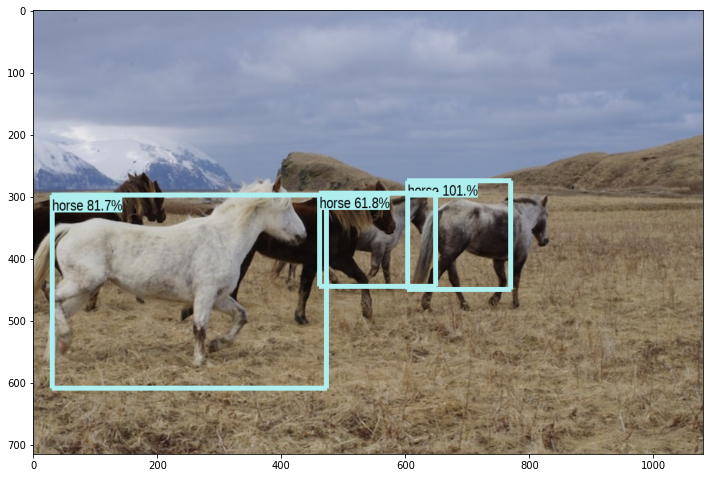

In [ ]:
 read_img("//content//Test2.jpg",0.25,12.)

In [ ]:
def draw(img,pred,thresh,fig):
  height ,width= tf.cast(tf.shape(img)[0],tf.double),tf.cast(tf.shape(img)[1],tf.double)
  cell_w,cell_h = tf.shape(pred)[0],tf.shape(pred)[1]
  #print(width,height)
  img = np.uint8(img*255)
  img = Image.fromarray(img)
  draw = ImageDraw.Draw(img)
  places=[]
  font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',int(height*2/100))
  
  for i in range(int(cell_w)):
    for j in range(int(cell_h)):
      
      if pred[i,j,12]>thresh and pred[i,j,12]>pred[i,j,13] and pred[i,j,12]>pred[i,j,14] :
        places.append([i,j,0])
        
      if pred[i,j,13]>thresh and pred[i,j,13]>pred[i,j,12] and pred[i,j,13]>pred[i,j,14] :
        places.append([i,j,1])
        
      if pred[i,j,14]>thresh and pred[i,j,14]>pred[i,j,12] and pred[i,j,14]>pred[i,j,13] :
        places.append([i,j,2])
        
  for i in places:
    #color=colors[random.randint(0,6)]
    prediction = pred[i[0],i[1],i[2]*4:i[2]*4+4].reshape(1,4)
    text = classes[tf.where(pred[i[0],i[1],15:]==np.max(pred[i[0],i[1],15:]))[0][0]]
    color= colors[classes[tf.where(pred[i[0],i[1],15:]==np.max(pred[i[0],i[1],15:]))[0][0]]]
    conf =  str(pred[i[0],i[1],12+i[2]])[:5]
    text = text+' '+conf+'%'
    xmin = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)-prediction[0,2]/2)*width)
    xmax = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)+prediction[0,2]/2)*width)
    ymin = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)-prediction[0,3]/2)*height)
    ymax = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)+prediction[0,3]/2)*height)
    #print(xmin,xmax,ymin,ymax)
    draw.line([(xmin,ymin),(xmin,ymax),(xmax,ymax),(xmax,ymin),(xmin,ymin)],width=int(width*0.5/100),fill=color)
    str_h = (1+2*0.05)*font.getsize(text)[1]
    text_bottom = ymin+str_h
    text_w,text_h = font.getsize(text)
    draw.rectangle([(xmin,text_bottom-text_h-0.05*text_h),(xmin+text_w,text_bottom)],fill=color)
    draw.text((xmin+0.05*text_h,text_bottom-text_h-0.09*text_h),text,fill='black',font=font)
  #plt.figure(figsize=[fig,fig])
  #plt.imshow(img)
  return np.array(img)

In [ ]:
def draw(img,pred,thresh,fig):
  height ,width= tf.cast(tf.shape(img)[0],tf.double),tf.cast(tf.shape(img)[1],tf.double)
  cell_w,cell_h = tf.shape(pred)[0],tf.shape(pred)[1]
  #print(width,height)
  img = np.uint8(img*255)
  img = Image.fromarray(img)
  draw = ImageDraw.Draw(img)
  places=[]
  font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',int(height*3.5/100))
  #grid = tf.meshgrid(tf.range(7),tf.range(7))
  #grid = tf.cast(tf.reshape(tf.concat(grid,axis=-1)/7,[1,7,7,1,2]),tf.float32)
  for i in range(int(cell_w)):
    for j in range(int(cell_h)):
      
      if pred[i,j,12]>thresh and pred[i,j,12]>pred[i,j,13] and pred[i,j,12]>pred[i,j,14] :
        places.append([i,j,0])
        
      if pred[i,j,13]>thresh and pred[i,j,13]>pred[i,j,12] and pred[i,j,13]>pred[i,j,14] :
        places.append([i,j,1])
        
      if pred[i,j,14]>thresh and pred[i,j,14]>pred[i,j,12] and pred[i,j,14]>pred[i,j,13] :
        places.append([i,j,2])
  boxes,scores,classe=[np.array([0,0,0,0])],[0],[0]
  for i in places:
    prediction = pred[i[0],i[1],i[2]*4:i[2]*4+4].reshape(1,4)
    xmin = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)-prediction[0,2]/2))
    xmax = tf.Variable((prediction[0,0]*(1/cell_w)+i[0]*(1/cell_w)+prediction[0,2]/2))
    ymin = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)-prediction[0,3]/2))
    ymax = tf.Variable((prediction[0,1]*(1/cell_h)+i[1]*(1/cell_h)+prediction[0,3]/2))
    boxes.append([xmin,ymin,xmax,ymax])
    scores.append(pred[i[0],i[1],12+i[2]])
    classe.append(pred[i[0],i[1],15:])
  boxes =np.array(boxes)
  scores = np.array(scores)
  #print(boxes)
  #classes
  pred = tf.image.non_max_suppression(boxes,scores,100,0.52,thresh)
 
  for i in pred:
    box = boxes[i]
    conf =str(scores[i]*100)
    text = classes[tf.where(classe[i]==np.max(classe[i]))[0][0]]
    color= colors[text]
    text = text+' '+conf[:4]+'%'
    xmin,ymin,xmax,ymax=tf.Variable(box[0]*width),tf.Variable(box[1]*height),tf.Variable(box[2]*width),tf.Variable(box[3]*height)
    draw.line([(xmin,ymin),(xmin,ymax),(xmax,ymax),(xmax,ymin),(xmin,ymin)],width=int(width*0.8/100),fill=color)
    str_h = (1+2*0.05)*font.getsize(text)[1]
    text_bottom = ymin+str_h
    text_w,text_h = font.getsize(text)
 
    draw.rectangle([(xmin,text_bottom-text_h-0.05*text_h),(xmin+text_w,text_bottom)],fill=color)
    draw.text((xmin+0.05*text_h,text_bottom-text_h-0.09*text_h),text,fill='black',font=font)
  return np.array(img)

In [ ]:
def detect_video(path):
  cap = cv2.VideoCapture(path)
  cc = cv2.VideoWriter_fourcc(*'MJPG')
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  out = cv2.VideoWriter("Test2_output.mp4",cc,25,(width,height))
  while True:
    try:
      ret,frame = cap.read()
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
      pre = np.array(predict(np.array([cv2.resize(frame,(448,448))])/255.))
      
      frame = draw(frame/255.,pre[0],0.3,1.)
      frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
      print("writing")
      out.write(frame)
      if cv2.waitKey()==ord("q"):
          break
    except :
      break
    
  out.release()
  cap.release()
detect_video("Test2.mp4")